# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [20]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [21]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [22]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [23]:
df_train.shape

(15223, 52)

In [24]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [25]:
df_test.shape

(14910, 52)

In [26]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [27]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [28]:
df = df_test.append(df_train).reset_index(drop=True)

In [29]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [30]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Неполное среднее', 'Два и более высших образования', 'Среднее специальное', 'Высшее', 'Ученая степень', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Подбор персонала', 'Транспорт', 'Туризм', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Развлечения/Искусство', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Торговля', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Маркетинг', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Сборочные производства', 'Государственная служба', 'Наука', 'Управляющая компания', 'Химия/Парфюмерия/Фармацевтика', 'Здравоохранение', 'Логистика', 'Образование', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Страхование', 'Строительство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [31]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски в данных есть, 

GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

Для категориальных признаков заменить на 'N/A', для числовых - на среднее или другое число

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

а) Кодировать one hot incoder и работать с разряженным пространством

б) либо кодировать признаки в числа словарем, но тогда алгоритм должен поддерживать категориальные признаки

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object'])) 
        if 'sample' in columnsToEncode: columnsToEncode.remove('sample')
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
        '''

In [51]:
#columnsToEncode = list(df_output.select_dtypes(include=['category','object'])) 
#if 'sample' in columnsToEncode: columnsToEncode.remove('sample')
columnsToEncode = ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM']

In [53]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    # str_to_float - при импортировании числа неверно распознались
    str_to_float = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    # str_with_null - строки с пропусками
    str_with_null = ['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE','REGION_NM','WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']
    # str_to_encode - строка с категориальными признаками для кодирования
    columnsToEncode = ['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE','REGION_NM']
    
    # Удаляло идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    for i in str_to_float:
        df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    # Что-то делала с пропусками
    for i in str_with_null: # перебираем все столбцы
        if str(df_output[i].dtype) == 'object':
            df_output[i].fillna('N/A', inplace=True) # выводим название столбца
        df_output[i].fillna(0, inplace = True)    
    
    # Кодировала категориальные признаки
    df_output = dummyEncode(df_output)
    
    return df_output

In [54]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [110]:
#X, y = df_preproc.iloc[:, 1:].values, df_preproc.iloc[:, 1].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#X, y = df_train_preproc.iloc[:, 1:].values, df_train_preproc.iloc[:, 1].values
#X_control, y_control = df_test_preproc.iloc[:, 1:].values, df_test_preproc.iloc[:, 1].values

X, y = df_train_preproc.iloc[:, 1:], df_train_preproc.iloc[:, 0]
X_control, y_control = df_test_preproc.iloc[:, 1:], df_test_preproc.iloc[:, 0]

In [111]:
y_control.value_counts()

0    13160
1     1750
Name: TARGET, dtype: int64

#### Задание 5. Обучение и оценка качества разных моделей

In [92]:
from sklearn.model_selection import train_test_split
test_size, random_state = 0.3, 42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [112]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
model_lr = LogisticRegression(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
# # Предсказание
# model.predict(X_test)
# model.predict_proba(X_test)
# model.decision_function(X_test)

In [127]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## Your Code Here
print('Accuracy лог.регрессии на train {}'.format(accuracy_score(y_train, model_lr.predict(X_train))))
print('Accuracy лог.регрессии на test {}'.format(accuracy_score(y_test, model_lr.predict(X_test))))

print('Accuracy DecisionTree на train {}'.format(accuracy_score(y_train, model_dt.predict(X_train))))
print('Accuracy DecisionTree на test {}'.format(accuracy_score(y_test, model_dt.predict(X_test))))

print('Accuracy RandomForest на train {}'.format(accuracy_score(y_train, model_rf.predict(X_train))))
print('Accuracy RandomForest на test {}'.format(accuracy_score(y_test, model_rf.predict(X_test))))

print('precision лог.регрессии на train {}'.format(precision_score(y_train, model_lr.predict(X_train))))
print('precision лог.регрессии на test {}'.format(precision_score(y_test, model_lr.predict(X_test))))

print('precision DecisionTree на train {}'.format(precision_score(y_train, model_dt.predict(X_train))))
print('precision DecisionTree на test {}'.format(precision_score(y_test, model_dt.predict(X_test))))

print('precision RandomForest на train {}'.format(precision_score(y_train, model_rf.predict(X_train))))
print('precision RandomForest на test {}'.format(precision_score(y_test, model_rf.predict(X_test))))

print('recall лог.регрессии на train {}'.format(recall_score(y_train, model_lr.predict(X_train))))
print('recall лог.регрессии на test {}'.format(recall_score(y_test, model_lr.predict(X_test))))

print('recall DecisionTree на train {}'.format(recall_score(y_train, model_dt.predict(X_train))))
print('recall DecisionTree на test {}'.format(recall_score(y_test, model_dt.predict(X_test))))

print('recall RandomForest на train {}'.format(recall_score(y_train, model_rf.predict(X_train))))
print('recall RandomForest на test {}'.format(recall_score(y_test, model_rf.predict(X_test))))

Accuracy лог.регрессии на train 0.881006006006006
Accuracy лог.регрессии на test 0.8793518721261222
Accuracy DecisionTree на train 1.0
Accuracy DecisionTree на test 0.7854171228377491
Accuracy RandomForest на train 0.980762012012012
Accuracy RandomForest на test 0.8776001751696957
precision лог.регрессии на train 0.125
precision лог.регрессии на test 0.3333333333333333
precision DecisionTree на train 1.0
precision DecisionTree на test 0.15097402597402598
precision RandomForest на train 1.0
precision RandomForest на test 0.3333333333333333
recall лог.регрессии на train 0.000792393026941363
recall лог.регрессии на test 0.0018181818181818182
recall DecisionTree на train 1.0
recall DecisionTree на test 0.1690909090909091
recall RandomForest на train 0.8375594294770206
recall RandomForest на test 0.016363636363636365


In [130]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
print(confusion_matrix(y_test,model_lr.predict(X_test)))
print(confusion_matrix(y_test,model_dt.predict(X_test)))
print(confusion_matrix(y_test,model_rf.predict(X_test)))

[[4015    2]
 [ 549    1]]
[[3494  523]
 [ 457   93]]
[[3999   18]
 [ 541    9]]


logreg auc 0.6591345870957522
DecisionTree auc 0.5194471224568312
RandomForest auc 0.6258947201665648


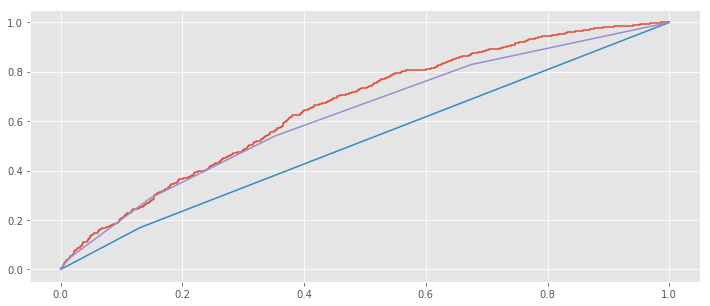

In [148]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#print(roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1]))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
# LogReg ROC curve
plt.plot(false_positive_rate,true_positive_rate)
#plt.show() 
auc = np.trapz(true_positive_rate,false_positive_rate)
print('logreg auc {}'.format(auc))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
# DecisionTree ROC curve
plt.plot(false_positive_rate,true_positive_rate)
auc = np.trapz(true_positive_rate,false_positive_rate)
print('DecisionTree auc {}'.format(auc))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
# RandomForest  ROC curve
plt.plot(false_positive_rate,true_positive_rate)
auc = np.trapz(true_positive_rate,false_positive_rate)
print('RandomForest auc {}'.format(auc))
plt.show() 

In [153]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
# в работе

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [ ]:
# Померить roc_auc на тесте
